In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [2]:
df= pd.read_csv("../UNZIP_FOR_NOTEBOOKS_FINAL/DATA/gene_expression.csv")

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

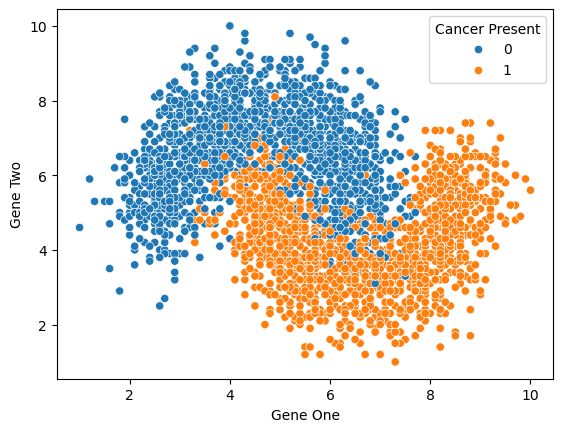

In [6]:
# we only have two features --> lets use scatterplot 
sns.scatterplot(x="Gene One" , y= "Gene Two" , data=df , hue="Cancer Present")

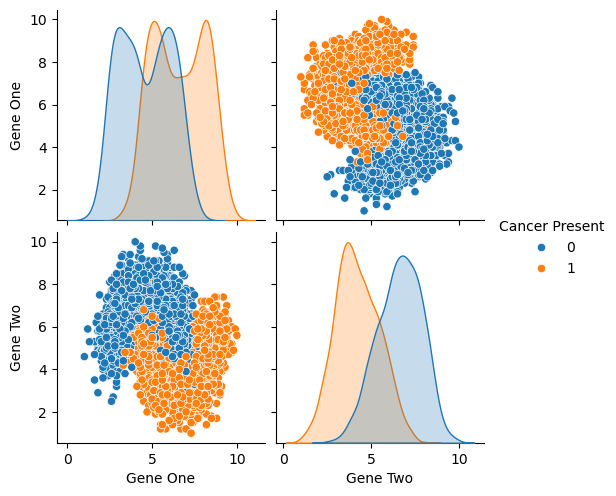

In [7]:
# pairplot 

sns.pairplot(data=df, hue="Cancer Present")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X = df.drop("Cancer Present" , axis=1)
y= df["Cancer Present"]

scaler = StandardScaler()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)


In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
#lets check for 1 neighbour
knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(scaled_X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [16]:
y_pred = knn_model.predict(scaled_X_test)

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

In [18]:
confusion_matrix(y_test, y_pred)

array([[465,  45],
       [ 57, 423]])

In [21]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       522
           1       0.88      0.90      0.89       468

    accuracy                           0.90       990
   macro avg       0.90      0.90      0.90       990
weighted avg       0.90      0.90      0.90       990



# CHOOSING THE CORRECT K FOR NEIGHBOURS

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
test_error_rates = []

for k in range (1 , 30):

    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test , y_pred_test)

    test_error_rates.append(test_error)

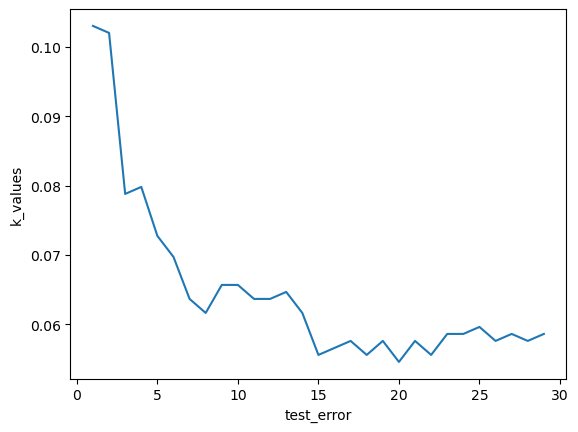

In [29]:
# lets check convergence 

plt.plot(range(1,30), test_error_rates)
plt.xlabel("test_error")
plt.ylabel("k_values")
plt.show()

### Pipeline  --> Grid search

In [30]:
# create isntances 
scaler = StandardScaler()

knn = KNeighborsClassifier()

In [31]:
# define de operations to follow the pipeline
operations = [("scaler" , scaler), ("knn" , knn)]

In [32]:
# impor pipeline method
from sklearn.pipeline import Pipeline

In [33]:
# create piplein intance
pipe = Pipeline(operations)

In [34]:
# improt gridsearch
from sklearn.model_selection import GridSearchCV

In [35]:
k_values = list(range(1,20))

In [36]:
param_grid = {"knn__n_neighbors": k_values}

In [37]:
full_cv_calssifier = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")

In [38]:
full_cv_calssifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [39]:
full_cv_calssifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [40]:
full_pred = full_cv_calssifier.predict(X_test)

In [41]:
print(classification_report(y_test , full_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       510
           1       0.95      0.93      0.94       480

    accuracy                           0.94       990
   macro avg       0.94      0.94      0.94       990
weighted avg       0.94      0.94      0.94       990



# check if model works 

In [42]:
new_patient = [[3.8 , 6.4]]

In [43]:
full_cv_calssifier.predict(new_patient)

/home/jdiego/anaconda3/envs/tesis/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [44]:
full_cv_calssifier.predict_proba(new_patient)

/home/jdiego/anaconda3/envs/tesis/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.89473684, 0.10526316]])